In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Train Data

In [3]:
data=pd.read_csv('/content/train_ctrUa4K.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data[i]=data[i].fillna(data[i].median())

In [10]:
for i in ['Gender','Married','Dependents','Self_Employed']:
  data[i]=data[i].fillna(data[i].mode)

In [11]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [13]:
for col in data.columns:
  if data[col].dtype=='object':
    data[col] = label_encoder .fit_transform(data[col].astype(str))

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


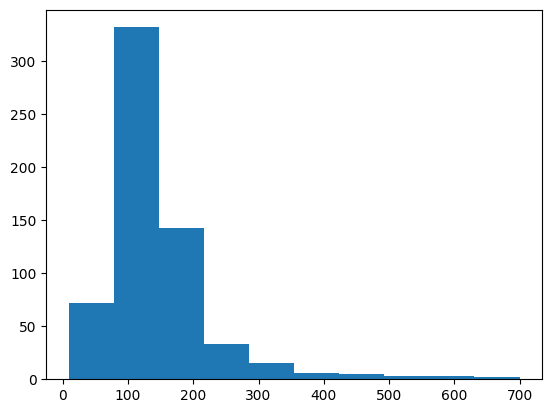

In [15]:
plt.hist(data['LoanAmount'])
plt.show()

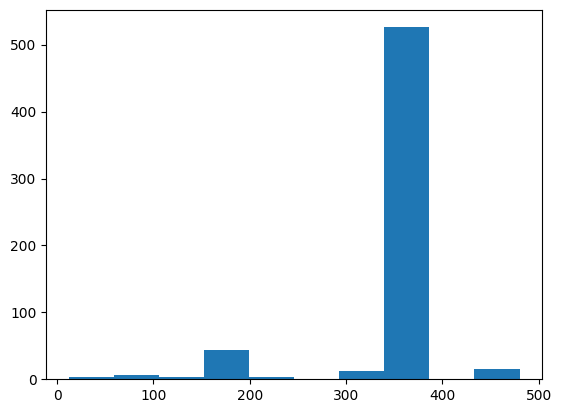

In [16]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

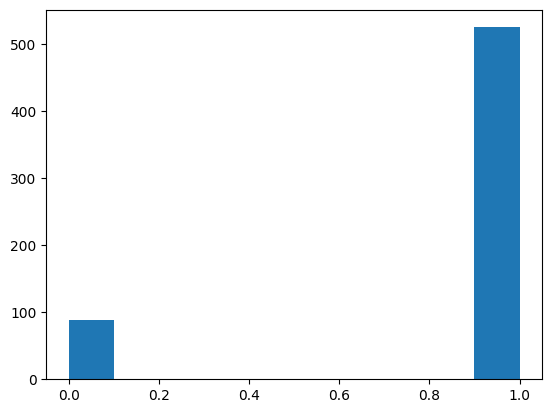

In [17]:
plt.hist(data['Credit_History'])
plt.show()

<Axes: >

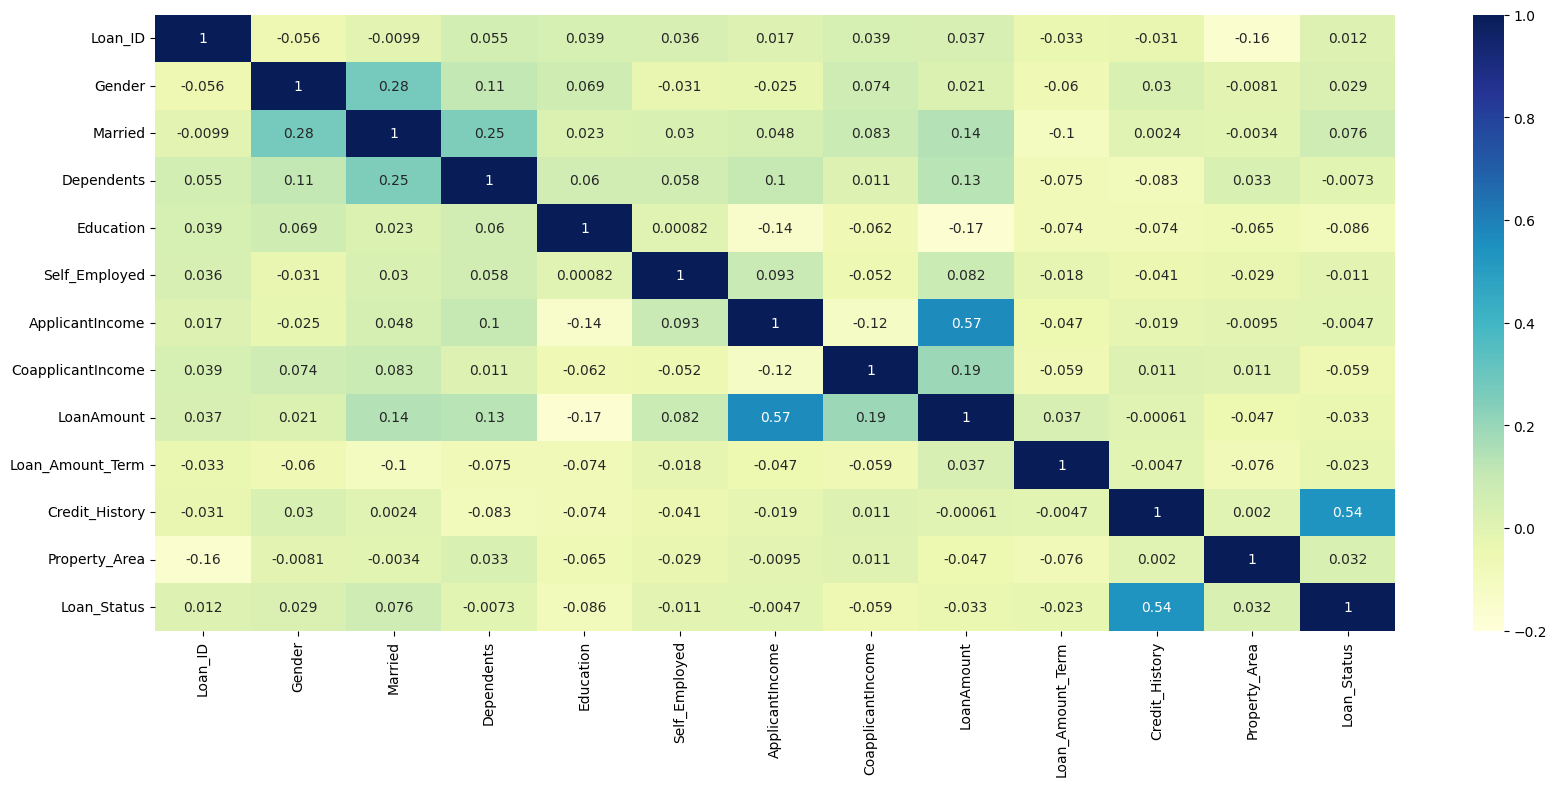

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

In [19]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


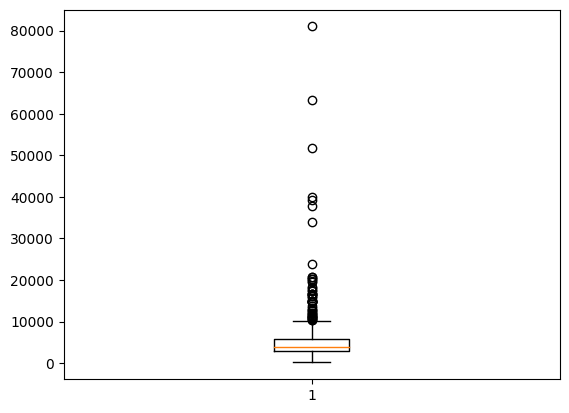

In [20]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

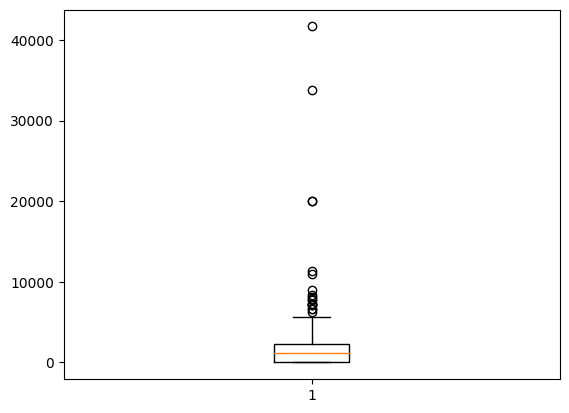

In [21]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

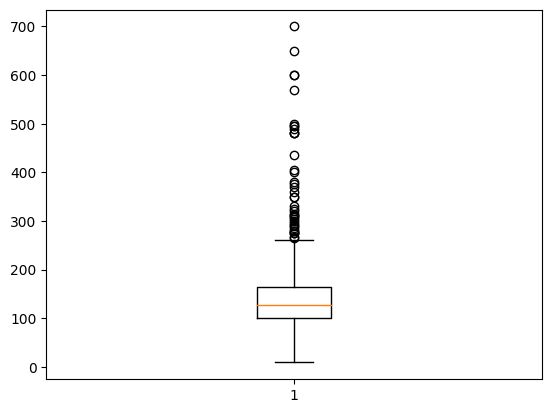

In [22]:
plt.boxplot(data['LoanAmount'])
plt.show()

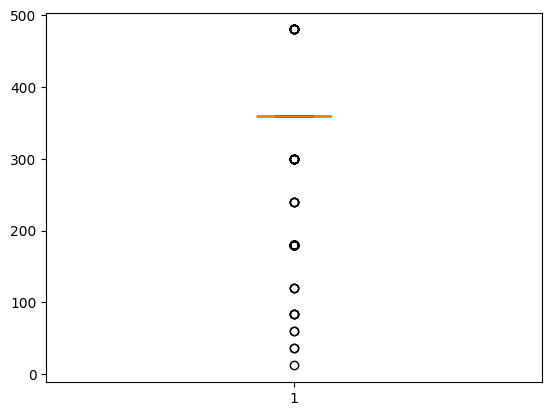

In [23]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [24]:
Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2879.0
3812.5
5790.0


<ipython-input-24-4fae17f038c8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
<ipython-input-24-4fae17f038c8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
<ipython-input-24-4fae17f038c8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3

In [25]:
IQR=Q3-Q1
IQR

2911.0

In [26]:
up_lim=Q3+1.5*IQR
up_lim

10156.5

In [27]:
low_lim=Q1-1.5*IQR
low_lim

-1487.5

In [28]:
def handle_outliers(hand_applicant_income,low_lim,up_lim):
  for i in range(len(hand_applicant_income)):
    if hand_applicant_income[i]<low_lim:
      hand_applicant_income[i]=low_lim
    elif hand_applicant_income[i]>up_lim:
      hand_applicant_income[i]=up_lim
    else:
      hand_applicant_income[i]==hand_applicant_income
  return handle_outliers

In [29]:
new_app_income = data['ApplicantIncome']
handle_outliers(new_app_income,low_lim,up_lim)
print(new_app_income)

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64


<ipython-input-28-e28f71589472>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_applicant_income[i]=up_lim


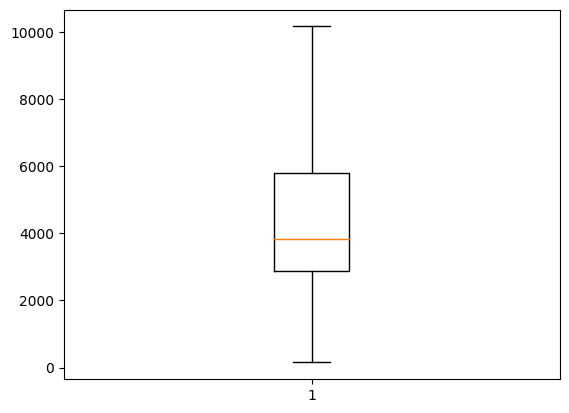

In [30]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [31]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,4615.910423,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,2477.158964,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,10156.500000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [32]:
Q1=np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['CoapplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
1188.5
2292.5


<ipython-input-32-a003f23a619e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
<ipython-input-32-a003f23a619e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
<ipython-input-32-a003f23a619e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)


In [33]:
IQR=Q3-Q1
IQR

2292.5

In [34]:
up_lim=Q3+1.5*IQR
up_lim

5731.25

In [35]:
low_lim=Q1-1.5*IQR
low_lim

-3438.75

In [36]:
def handle_outliers(hand_coapplicant_income,low_lim,up_lim):
  for i in range(len(hand_coapplicant_income)):
    if hand_coapplicant_income[i]<low_lim:
      hand_coapplicant_income[i]=low_lim
    elif hand_coapplicant_income[i]>up_lim:
      hand_coapplicant_income[i]=up_lim
    else:
      hand_coapplicant_income[i]==hand_coapplicant_income
  return handle_outliers

In [37]:
new_coapp_income = data['CoapplicantIncome']
handle_outliers(new_coapp_income,low_lim,up_lim)
print(new_coapp_income)

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64


<ipython-input-36-3549c90d3ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_coapplicant_income[i]=up_lim


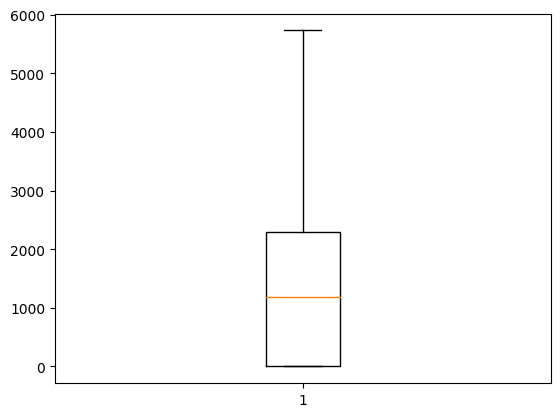

In [38]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [39]:
Q1=np.percentile(data['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(data['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(data['LoanAmount'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

100.5
128.0
164.5


<ipython-input-39-1b8c449bfbe9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['LoanAmount'],25,interpolation='midpoint')
<ipython-input-39-1b8c449bfbe9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['LoanAmount'],50,interpolation='midpoint')
<ipython-input-39-1b8c449bfbe9>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percen

In [40]:
IQR=Q3-Q1
IQR

64.0

In [41]:
up_lim=Q3+1.5*IQR
up_lim

260.5

In [42]:
low_lim=Q1-1.5*IQR
low_lim

4.5

In [43]:
def handle_outliers(hand_loan_amount,low_lim,up_lim):
  for i in range(len(hand_loan_amount)):
    if hand_loan_amount[i]<low_lim:
      hand_loan_amount[i]=low_lim
    elif hand_loan_amount[i]>up_lim:
      hand_loan_amount[i]=up_lim
    else:
      hand_loan_amount[i]==hand_loan_amount
  return handle_outliers

In [44]:
new_loan_amount = data['LoanAmount']
handle_outliers(new_loan_amount,low_lim,up_lim)
print(new_loan_amount)

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


<ipython-input-43-c94ae603347a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount[i]=up_lim


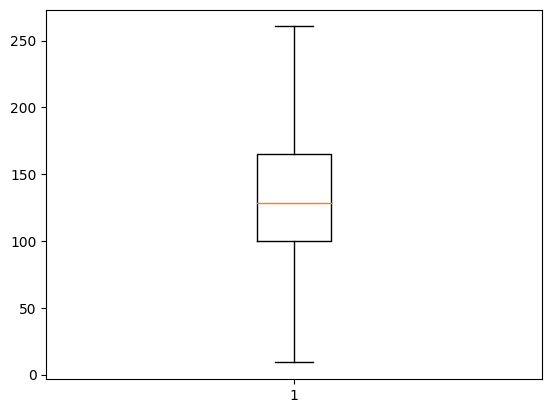

In [45]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [46]:
Q1=np.percentile(data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2=np.percentile(data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3=np.percentile(data['Loan_Amount_Term'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

360.0
360.0
360.0


<ipython-input-46-1f74a7931dd4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Loan_Amount_Term'],25,interpolation='midpoint')
<ipython-input-46-1f74a7931dd4>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Loan_Amount_Term'],50,interpolation='midpoint')
<ipython-input-46-1f74a7931dd4>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  

In [47]:
IQR=Q3-Q1
IQR

0.0

In [48]:
up_lim=Q3+1.5*IQR
up_lim

360.0

In [49]:
low_lim=Q1-1.5*IQR
low_lim

360.0

In [50]:
def handle_outliers(hand_loan_amount_term,low_lim,up_lim):
  for i in range(len(hand_loan_amount_term)):
    if hand_loan_amount_term[i]<low_lim:
      hand_loan_amount_term[i]=low_lim
    elif hand_loan_amount_term[i]>up_lim:
      hand_loan_amount_term[i]=up_lim
    else:
      hand_loan_amount_term[i]==hand_loan_amount_term
  return handle_outliers

In [51]:
new_loan_amount_term = data['Loan_Amount_Term']
handle_outliers(new_loan_amount_term,low_lim,up_lim)
print(new_loan_amount_term)

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    360.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64


<ipython-input-50-155e38df9322>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount_term[i]=low_lim
<ipython-input-50-155e38df9322>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount_term[i]=up_lim


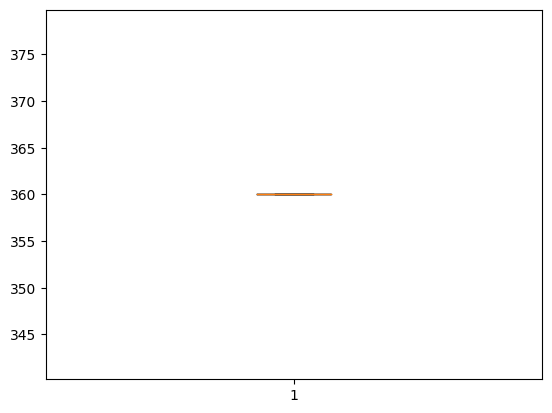

In [52]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [53]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,4615.910423,1419.354104,137.298860,360.0,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,2477.158964,1623.678913,55.631264,0.0,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.0,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.0,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.0,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,10156.500000,5731.250000,260.500000,360.0,1.000000,2.000000,1.000000


In [54]:
data1=data.drop('Loan_ID',axis=1)

In [55]:
data1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000
mean,1.775244,1.643322,0.842020,0.218241,1.081433,4615.910423,1419.354104,137.298860,360.0,0.855049,1.037459,0.687296
std,0.465767,0.489511,1.120531,0.413389,0.423472,2477.158964,1623.678913,55.631264,0.0,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.0,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.0,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.0,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,10156.500000,5731.250000,260.500000,360.0,1.000000,2.000000,1.000000


In [56]:
x=data1.drop('Loan_Status',axis=1)
y=data1['Loan_Status']

In [57]:
x1 = x.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [58]:
x1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,4615.910423,1419.354104,137.298860
std,2477.158964,1623.678913,55.631264
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,10156.500000,5731.250000,260.500000


In [59]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1 = min_max_scaler.fit_transform(x1)
x1

array([[0.56952981, 0.        , 0.47316103],
       [0.44301204, 0.26311887, 0.47316103],
       [0.28481487, 0.        , 0.22664016],
       ...,
       [0.7916854 , 0.04187568, 0.97017893],
       [0.74281717, 0.        , 0.70775348],
       [0.44301204, 0.        , 0.49304175]])

In [60]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.569530,0.000000,0.473161
1,0.443012,0.263119,0.473161
2,0.284815,0.000000,0.226640
3,0.243142,0.411429,0.441352
4,0.584620,0.000000,0.524851
...,...,...,...
609,0.274821,0.000000,0.246521
610,0.395343,0.000000,0.123260
611,0.791685,0.041876,0.970179
612,0.742817,0.000000,0.707753


In [61]:
x2=x.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,2,1,0,1,360.0,1.0,0
2,2,2,0,0,2,360.0,1.0,2
3,2,2,0,1,1,360.0,1.0,2
4,2,1,0,0,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0
610,2,2,3,0,1,360.0,1.0,0
611,2,2,1,0,1,360.0,1.0,2
612,2,2,2,0,1,360.0,1.0,2


In [62]:
x3=pd.concat([x2,x1],axis=1)
x3

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,0.569530,0.000000,0.473161
1,2,2,1,0,1,360.0,1.0,0,0.443012,0.263119,0.473161
2,2,2,0,0,2,360.0,1.0,2,0.284815,0.000000,0.226640
3,2,2,0,1,1,360.0,1.0,2,0.243142,0.411429,0.441352
4,2,1,0,0,1,360.0,1.0,2,0.584620,0.000000,0.524851
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0,0.274821,0.000000,0.246521
610,2,2,3,0,1,360.0,1.0,0,0.395343,0.000000,0.123260
611,2,2,1,0,1,360.0,1.0,2,0.791685,0.041876,0.970179
612,2,2,2,0,1,360.0,1.0,2,0.742817,0.000000,0.707753


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x3,y,random_state=42,test_size=0.25)


Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.7727272727272727
precision is 0.7480916030534351
Recall is 0.98
f1 score is 0.8484848484848484


In [66]:
confusion_matrix(y_test,y_pred)

array([[21, 33],
       [ 2, 98]])

KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
    

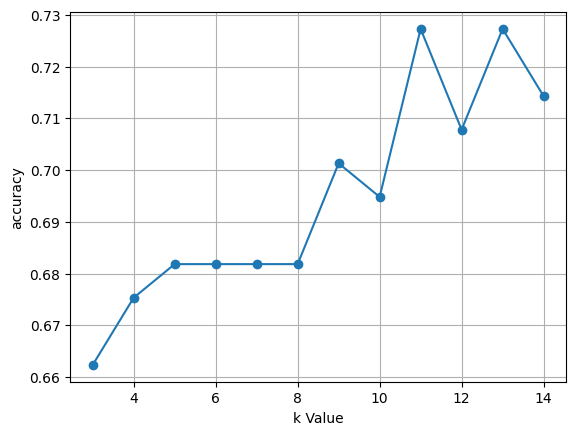

In [68]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [69]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred) 

Accuracy is 0.7272727272727273
precision is 0.704225352112676
Recall is 1.0
f1 score is 0.8264462809917354


array([[ 12,  42],
       [  0, 100]])

Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.6363636363636364
[[23 31]
 [25 75]]


Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.7402597402597403
[[21 33]
 [ 7 93]]


#TESTING

In [76]:
test_data=pd.read_csv('/content/test_lAUu6dG.csv')

In [77]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [79]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [78]:
test_data.shape

(367, 12)

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [81]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [82]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [83]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

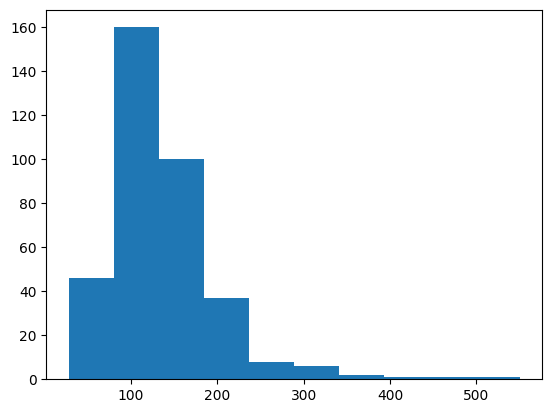

In [84]:
plt.hist(test_data['LoanAmount'])
plt.show()

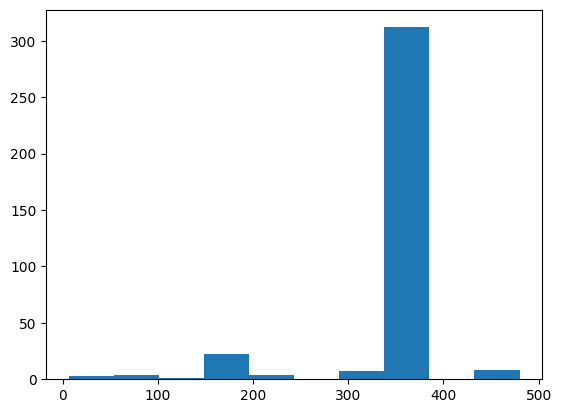

In [85]:
plt.hist(test_data['Loan_Amount_Term'])
plt.show()

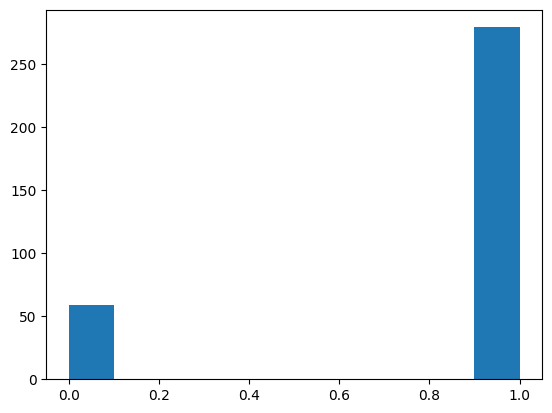

In [86]:
plt.hist(test_data['Credit_History'])
plt.show()

#Preprocessing

In [87]:
for i in ['Gender','Dependents','Self_Employed']:
  test_data[i]=test_data[i].fillna(test_data[i].mode)

In [88]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  test_data[i]=test_data[i].fillna(test_data[i].median())

In [89]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [90]:
test_data1=test_data.drop('Loan_ID',axis=1)
test_data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [91]:
#encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in test_data1.columns:
  if test_data1[col].dtype=='object':
    test_data1[col]=label_encoder.fit_transform(test_data1[col].astype(str))

In [92]:
test_data1.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [93]:
test_data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5720,0,110.0,360.0,1.0,2
1,2,1,1,0,1,3076,1500,126.0,360.0,1.0,2
2,2,1,2,0,1,5000,1800,208.0,360.0,1.0,2
3,2,1,2,0,1,2340,2546,100.0,360.0,1.0,2
4,2,0,0,1,1,3276,0,78.0,360.0,1.0,2


In [94]:
test_data1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4805.599455,1569.577657,135.980926,342.822888,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,4910.685399,2334.232099,60.959739,64.658402,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


<Axes: >

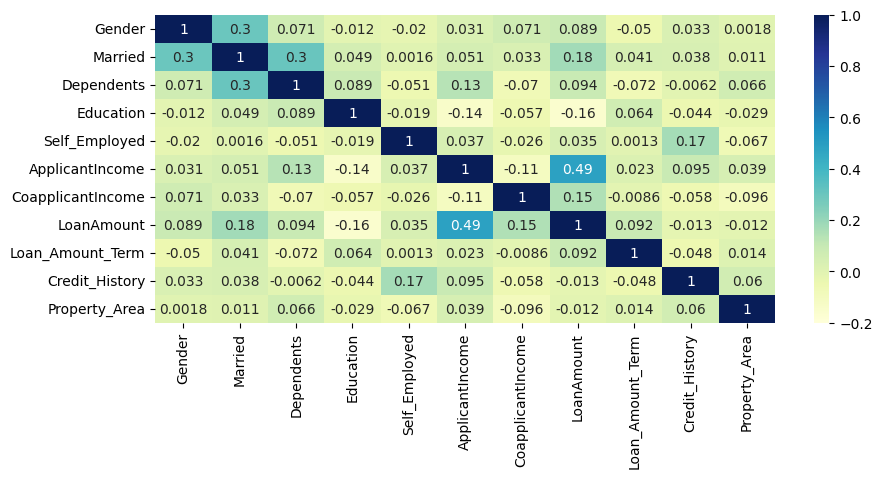

In [95]:
## correlation
corrmatrix=test_data1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

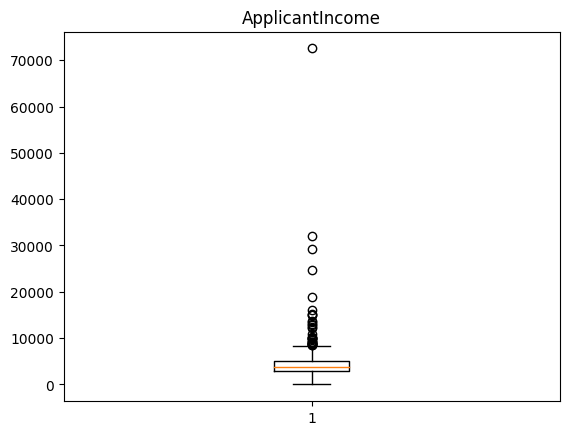

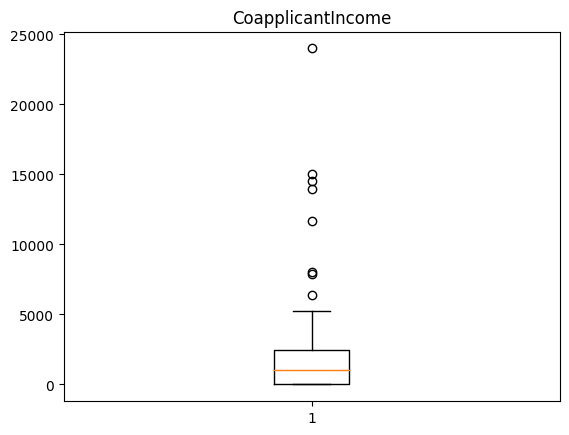

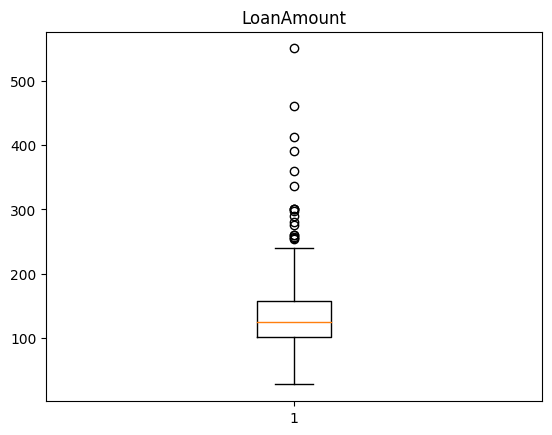

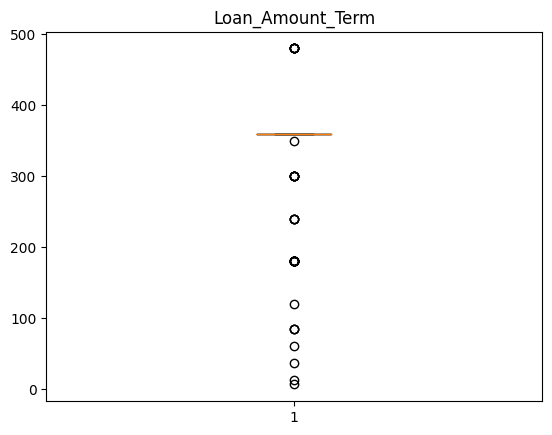

In [96]:
#boxplot
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.figure()
  plt.boxplot(test_data1[i])
  plt.title(i)

In [97]:
#capping
def iqr_capping(df,variables):
  
  q1=df[variables].quantile(0.25)
  q3=df[variables].quantile(0.75)
  iqr=q3-q1
  upper_whisker=q3+(1.5*iqr)
  lower_whisker=q1-(1.5*iqr)
  return lower_whisker,upper_whisker

In [98]:
lower_applicant,upper_applicant=iqr_capping(test_data1,'ApplicantIncome')
print('lower applicant = ',lower_applicant)
print('upper applicant = ',upper_applicant)
test_data1['ApplicantIncome']=np.where(test_data1['ApplicantIncome']>upper_applicant,upper_applicant,
                    np.where(test_data1['ApplicantIncome']<lower_applicant,lower_applicant,test_data1['ApplicantIncome']))

lower applicant =  -430.0
upper applicant =  8354.0


In [99]:
lower_coapplicant,upper_coapplicant=iqr_capping(test_data1,'CoapplicantIncome')
print('lower coapplicant = ',lower_coapplicant)
print('upper coapplicant = ',upper_coapplicant)
test_data1['CoapplicantIncome']=np.where(test_data1['CoapplicantIncome']>upper_coapplicant,upper_coapplicant,
                    np.where(test_data1['CoapplicantIncome']<lower_coapplicant,lower_coapplicant,test_data1['CoapplicantIncome']))

lower coapplicant =  -3645.75
upper coapplicant =  6076.25


In [100]:
lower_loan,upper_loan=iqr_capping(test_data1,'LoanAmount')
print('lower loan = ',lower_loan)
print('upper loan = ',upper_loan)
test_data1['LoanAmount']=np.where(test_data1['LoanAmount']>upper_loan,upper_loan,
                    np.where(test_data1['LoanAmount']<lower_loan,lower_loan,test_data1['LoanAmount']))

lower loan =  16.25
upper loan =  242.25


In [101]:
lower_loan_term,upper_loan_term=iqr_capping(test_data1,'Loan_Amount_Term')
print('lower loan term = ',lower_loan_term)
print('upper loan term = ',upper_loan_term)
test_data1['Loan_Amount_Term']=np.where(test_data1['Loan_Amount_Term']>upper_loan_term,upper_loan_term,
                    np.where(test_data1['Loan_Amount_Term']<lower_loan_term,lower_loan_term,test_data1['Loan_Amount_Term']))

lower loan term =  360.0
upper loan term =  360.0


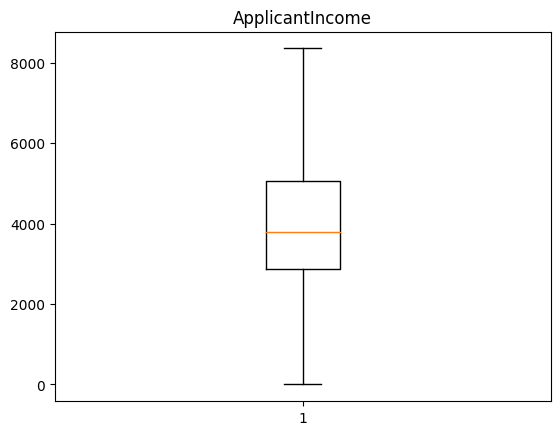

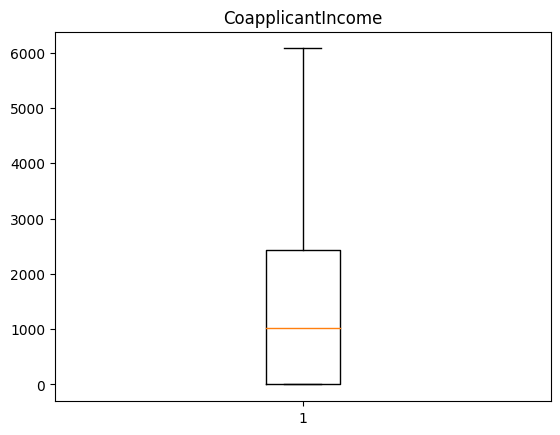

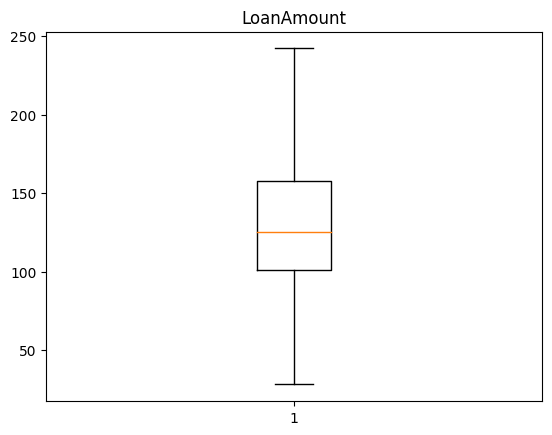

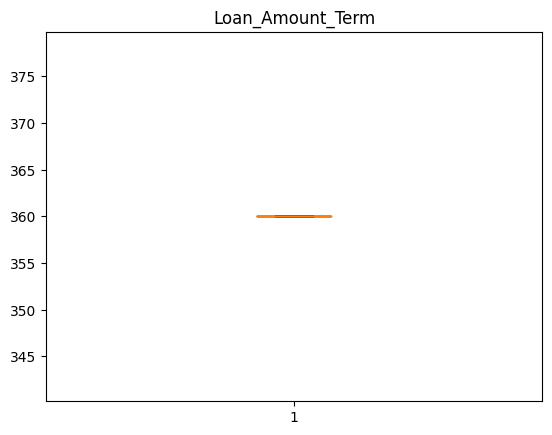

In [102]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.figure()
  plt.boxplot(test_data1[i])
  plt.title(i)

In [103]:
test_data1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4238.964578,1425.501362,131.957766,360.0,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,1950.976357,1600.086250,46.926185,0.0,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,360.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.0,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.0,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.0,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,8354.000000,6076.250000,242.250000,360.0,1.000000,2.000000


In [104]:
test_data1.shape

(367, 11)

In [105]:
x=test_data1.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,367.000000
mean,4238.964578,1425.501362,131.957766
std,1950.976357,1600.086250,46.926185
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,157.500000
max,8354.000000,6076.250000,242.250000


In [106]:
# minmax scaling

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x=min_max_scaler.fit_transform(x)
x

array([[0.68470194, 0.        , 0.38273046],
       [0.36820685, 0.24686279, 0.45740957],
       [0.59851568, 0.29623534, 0.84014002],
       ...,
       [0.38903519, 0.32799835, 0.45740957],
       [0.59851568, 0.39382843, 0.60676779],
       [1.        , 0.        , 0.32672112]])

In [107]:
x=pd.DataFrame(x,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
x

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.684702,0.000000,0.382730
1,0.368207,0.246863,0.457410
2,0.598516,0.296235,0.840140
3,0.280105,0.419008,0.336056
4,0.392147,0.000000,0.233372
...,...,...,...
362,0.479890,0.292450,0.396733
363,0.497726,0.116684,0.406068
364,0.389035,0.327998,0.457410
365,0.598516,0.393828,0.606768


In [108]:
x1=test_data1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x1

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,1,1,0,1,360.0,1.0,2
2,2,1,2,0,1,360.0,1.0,2
3,2,1,2,0,1,360.0,1.0,2
4,2,0,0,1,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2
363,2,1,0,0,1,360.0,1.0,2
364,2,0,0,0,1,360.0,1.0,1
365,2,1,0,0,1,360.0,1.0,0


In [109]:
x2=pd.concat([x1,x],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,0.684702,0.000000,0.382730
1,2,1,1,0,1,360.0,1.0,2,0.368207,0.246863,0.457410
2,2,1,2,0,1,360.0,1.0,2,0.598516,0.296235,0.840140
3,2,1,2,0,1,360.0,1.0,2,0.280105,0.419008,0.336056
4,2,0,0,1,1,360.0,1.0,2,0.392147,0.000000,0.233372
...,...,...,...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2,0.479890,0.292450,0.396733
363,2,1,0,0,1,360.0,1.0,2,0.497726,0.116684,0.406068
364,2,0,0,0,1,360.0,1.0,1,0.389035,0.327998,0.457410
365,2,1,0,0,1,360.0,1.0,0,0.598516,0.393828,0.606768


In [110]:
#logistic reggression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
test_y_pred=logit_model.predict(x2)
test_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [111]:
loan_st=pd.DataFrame(test_y_pred,columns=['Loan_Status'])

In [112]:
loan_st

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [113]:
loan_st['Loan_Status'].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [114]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [115]:
l=test_data.drop(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [116]:
log_reg=pd.concat([l,loan_st],axis=1)
log_reg

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [117]:
log_reg['Loan_Status']=log_reg['Loan_Status'].replace({1:'Y',0:'N'})
log_reg['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [118]:
log_reg

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [119]:
log_reg.to_csv('logreg_pred.csv',index=False)

#KNN

In [120]:
classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
classifier.fit(x_train,y_train)
knn_y_pred = classifier.predict(x2)


In [121]:
knn=pd.DataFrame(knn_y_pred,columns=['Loan_Status'])

In [122]:
knn

,Loan_Status
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,1
365,1


In [123]:
knn_reg=pd.concat([l,knn],axis=1)
knn_reg

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [124]:
knn_reg['Loan_Status']=knn_reg['Loan_Status'].replace({1:'Y',0:'N'})
knn_reg['Loan_Status'].value_counts()

Y    310
N     57
Name: Loan_Status, dtype: int64

In [125]:
knn_reg

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [126]:
knn_reg.to_csv('KNN.csv',index=False)

#Decision tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dec_y_pred = dt_clf.predict(x2)

In [128]:
dec=pd.DataFrame(dec_y_pred,columns=['Loan_Status'])
dec

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [129]:
dec_reg=pd.concat([l,dec],axis=1)
dec_reg

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [130]:
dec_reg['Loan_Status']=dec_reg['Loan_Status'].replace({1:'Y',0:'N'})
dec_reg['Loan_Status'].value_counts()

Y    254
N    113
Name: Loan_Status, dtype: int64

In [131]:
dec_reg.to_csv('Decision_tree.csv',index=False)

#Random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
rand_y_pred= rf_clf.predict(x2)

In [133]:
random=pd.DataFrame(rand_y_pred,columns=['Loan_Status'])
random_reg=pd.concat([l,random],axis=1)
random_reg['Loan_Status']=random_reg['Loan_Status'].replace({1:'Y',0:'N'})
random_reg['Loan_Status'].value_counts()

Y    286
N     81
Name: Loan_Status, dtype: int64

In [134]:
random_reg.to_csv('Random_forest.csv',index=False)

#SVM

In [135]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
svm_y_pred= svmclf.predict(x2)

In [136]:
svm=pd.DataFrame(svm_y_pred,columns=['Loan_Status'])
svm_reg=pd.concat([l,svm],axis=1)
svm_reg['Loan_Status']=svm_reg['Loan_Status'].replace({1:'Y',0:'N'})
svm_reg['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [137]:
svm_reg.to_csv('svm.csv',index=False)

#Hyper parametric tuning

In [138]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)
hyper_y_pred= rf_clf.predict(x2)

In [139]:
hyper=pd.DataFrame(hyper_y_pred,columns=['Loan_Status'])
hyper_reg=pd.concat([l,hyper],axis=1)
hyper_reg['Loan_Status']=hyper_reg['Loan_Status'].replace({1:'Y',0:'N'})
hyper_reg['Loan_Status'].value_counts()

Y    310
N     57
Name: Loan_Status, dtype: int64

In [140]:
hyper_reg.to_csv('hyper.csv',index=False)